<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/figure2_country_comparison_pie.png'

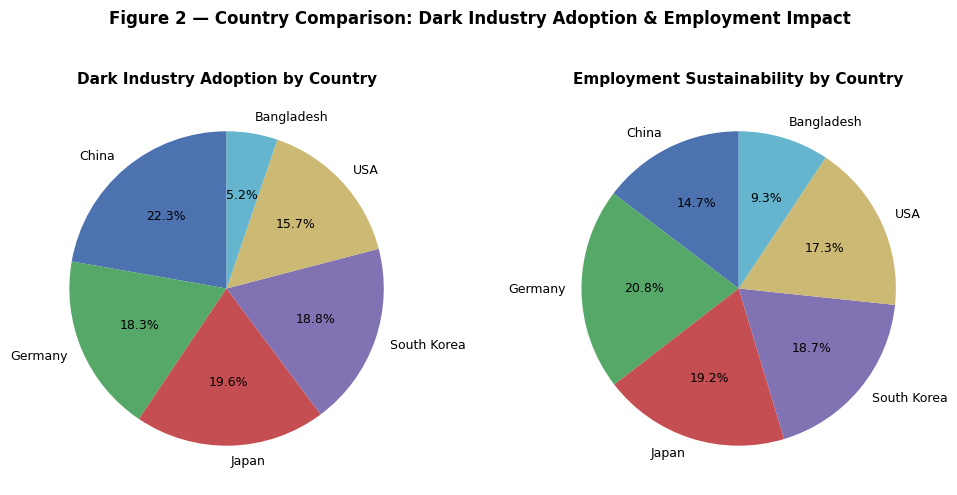

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Data for the pie charts ---
data = {
    "Country": ["China", "Germany", "Japan", "South Korea", "USA", "Bangladesh"],
    "Dark_Industry_Adoption_Index": [85, 70, 75, 72, 60, 20],
    "Employment_Sustainability_Index": [55, 78, 72, 70, 65, 35]
}

df = pd.DataFrame(data)

# --- Plot configuration ---
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Color palette (professional & consistent)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']

# --- Pie 1: Dark Industry Adoption ---
axes[0].pie(
    df["Dark_Industry_Adoption_Index"],
    labels=df["Country"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 9}
)
axes[0].set_title("Dark Industry Adoption by Country", fontsize=11, fontweight='bold')

# --- Pie 2: Employment Sustainability ---
axes[1].pie(
    df["Employment_Sustainability_Index"],
    labels=df["Country"],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 9}
)
axes[1].set_title("Employment Sustainability by Country", fontsize=11, fontweight='bold')

plt.suptitle("Figure 2 — Country Comparison: Dark Industry Adoption & Employment Impact", fontsize=12, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.92])

# --- Save the figure ---
output_path = "/mnt/data/figure2_country_comparison_pie.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"✅ Figure saved at: {output_path}")


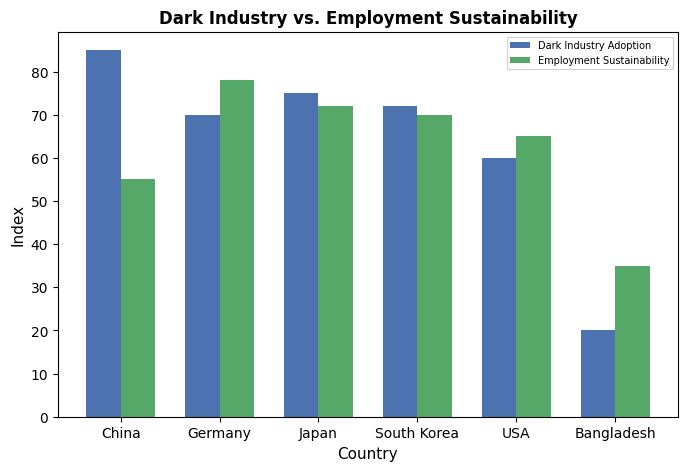

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# --- Data ---
data = {
    "Country": ["China", "Germany", "Japan", "South Korea", "USA", "Bangladesh"],
    "Dark_Industry_Adoption_Index": [85, 70, 75, 72, 60, 20],
    "Employment_Sustainability_Index": [55, 78, 72, 70, 65, 35]
}

df = pd.DataFrame(data)
df["Gap"] = df["Dark_Industry_Adoption_Index"] - df["Employment_Sustainability_Index"]

# --- Plot ---
x = np.arange(len(df["Country"]))  # Country positions
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Bars for each variable
bars1 = ax.bar(x - width/2, df["Dark_Industry_Adoption_Index"], width, label="Dark Industry Adoption", color="#4C72B0")
bars2 = ax.bar(x + width/2, df["Employment_Sustainability_Index"], width, label="Employment Sustainability", color="#55A868")

# Add labels
ax.set_xlabel("Country", fontsize=11)
ax.set_ylabel("Index", fontsize=11)
ax.set_title("Dark Industry vs. Employment Sustainability", fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(df["Country"])
ax.legend(fontsize=9)
ax.grid(False)


plt.legend(bbox_to_anchor=(1,1), fontsize=7)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/figure2c_heatmap_comparison.png'

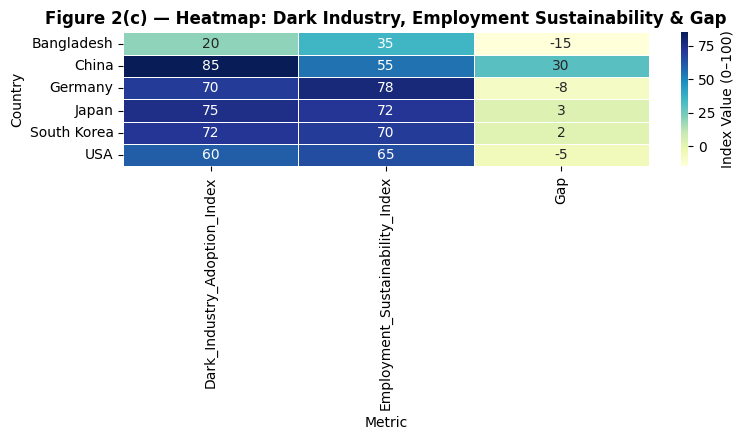

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Data ---
data = {
    "Country": ["China", "Germany", "Japan", "South Korea", "USA", "Bangladesh"],
    "Dark_Industry_Adoption_Index": [85, 70, 75, 72, 60, 20],
    "Employment_Sustainability_Index": [55, 78, 72, 70, 65, 35]
}

df = pd.DataFrame(data)
df["Gap"] = df["Dark_Industry_Adoption_Index"] - df["Employment_Sustainability_Index"]

# --- Prepare data for heatmap ---
df_melted = df.melt(id_vars="Country", var_name="Metric", value_name="Index")

# --- Plot ---
plt.figure(figsize=(8, 4.5))
heatmap = sns.heatmap(
    df.pivot_table(index="Country", values=["Dark_Industry_Adoption_Index", "Employment_Sustainability_Index", "Gap"]),
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    cbar_kws={"label": "Index Value (0–100)"},
    linewidths=0.5
)

plt.title("Figure 2(c) — Heatmap: Dark Industry, Employment Sustainability & Gap", fontsize=12, fontweight='bold')
plt.ylabel("Country")
plt.xlabel("Metric")

plt.tight_layout()
output_path = "/mnt/data/figure2c_heatmap_comparison.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()

print(f"✅ Figure saved at: {output_path}")


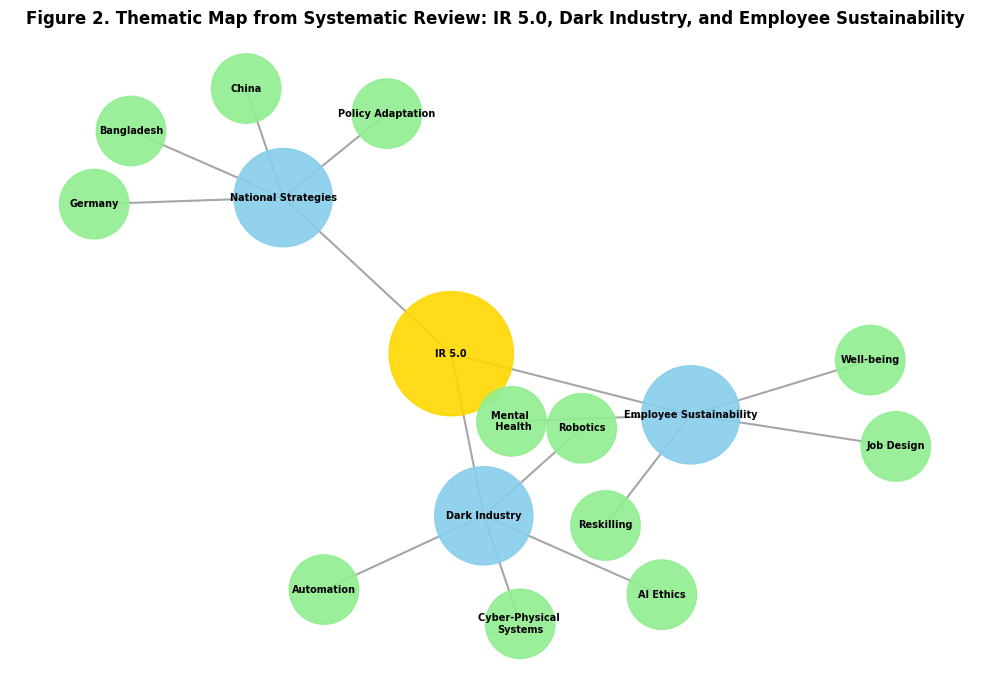

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# --- Create Graph ---
G = nx.Graph()

# Central Theme
G.add_node("IR 5.0", size=8000)

# Major Clusters
major_clusters = ["Dark Industry", "Employee Sustainability", "National Strategies"]
for mc in major_clusters:
    G.add_node(mc, size=5000)
    G.add_edge("IR 5.0", mc)

# Subthemes
subthemes = {
    "Dark Industry": ["Automation", "AI Ethics", "Robotics", "Cyber-Physical \nSystems"],
    "Employee Sustainability": ["Reskilling", "Mental \n Health", "Job Design", "Well-being"],
    "National Strategies": ["China", "Germany", "Bangladesh", "Policy Adaptation"]
}

for cluster, subs in subthemes.items():
    for s in subs:
        G.add_node(s, size=2500)
        G.add_edge(cluster, s)

# --- Visualization ---
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.6, seed=15)

# Node colors by layer
colors = []
for node in G.nodes():
    if node == "IR 5.0":
        colors.append("#FFD700")  # gold
    elif node in major_clusters:
        colors.append("#87CEEB")  # sky blue
    else:
        colors.append("#90EE90")  # light green

# Draw network
nx.draw_networkx_nodes(G, pos, node_size=[G.nodes[n].get('size', 2000) for n in G.nodes()],
                       node_color=colors, alpha=0.9)
nx.draw_networkx_edges(G, pos, width=1.5, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=7, font_weight="bold")

plt.title("Figure 2. Thematic Map from Systematic Review: IR 5.0, Dark Industry, and Employee Sustainability",
          fontsize=12, fontweight="bold")
plt.axis("off")
plt.tight_layout()

plt.show()




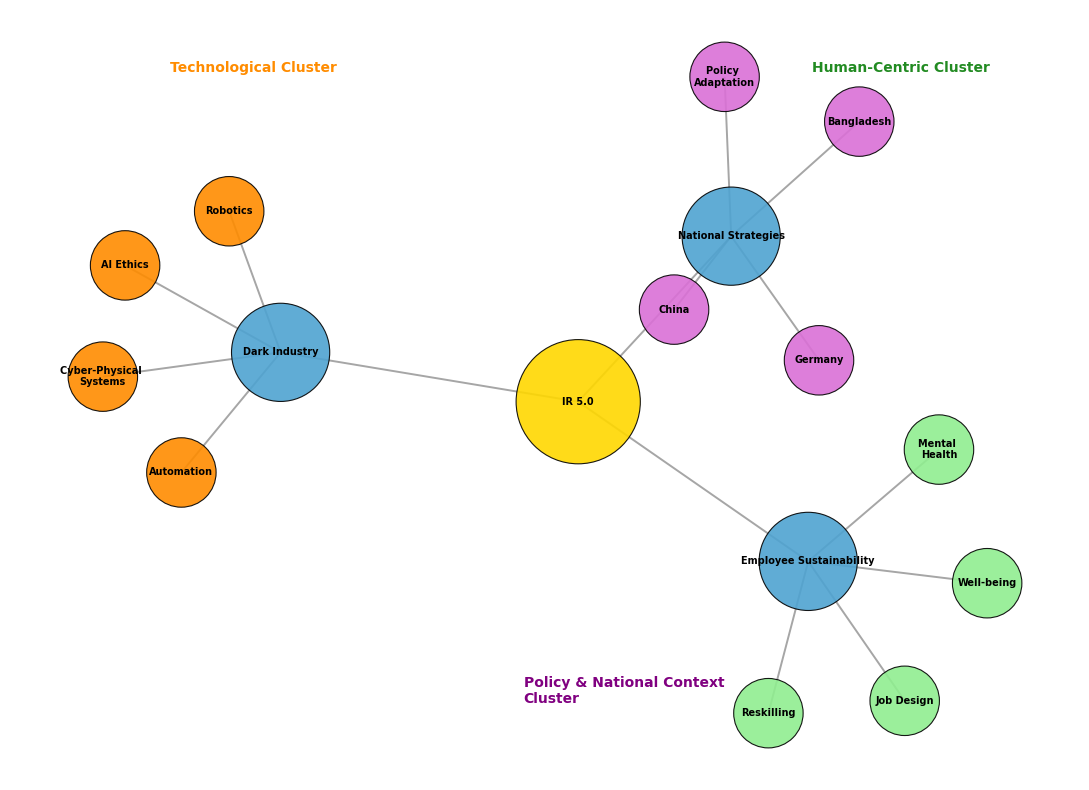

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# --- Create Graph ---
G = nx.Graph()

# Central theme
G.add_node("IR 5.0", size=8000)

# Major clusters
clusters = {
    "Dark Industry": ["Automation", "AI Ethics", "Robotics", "Cyber-Physical \nSystems"],
    "Employee Sustainability": ["Reskilling", "Mental \nHealth", "Job Design", "Well-being"],
    "National Strategies": ["China", "Germany", "Bangladesh", "Policy \nAdaptation"]
}

# Add cluster nodes and subthemes
for cluster, subs in clusters.items():
    G.add_node(cluster, size=5000)
    G.add_edge("IR 5.0", cluster)
    for sub in subs:
        G.add_node(sub, size=2500)
        G.add_edge(cluster, sub)

# --- Visualization ---
plt.figure(figsize=(11, 8))
pos = nx.spring_layout(G, k=0.55, seed=22)

# Node colors by thematic cluster
colors = []
for node in G.nodes():
    if node == "IR 5.0":
        colors.append("#FFD700")  # central - gold
    elif node in clusters.keys():
        colors.append("#4FA3D1")  # main clusters - blue
    elif node in clusters["Dark Industry"]:
        colors.append("#FF8C00")  # subthemes - orange
    elif node in clusters["Employee Sustainability"]:
        colors.append("#90EE90")  # subthemes - green
    elif node in clusters["National Strategies"]:
        colors.append("#DA70D6")  # subthemes - purple
    else:
        colors.append("#CCCCCC")

# Node sizes
sizes = [G.nodes[n].get("size", 2000) for n in G.nodes()]

# Draw network
nx.draw_networkx_nodes(G, pos, node_size=sizes, node_color=colors, alpha=0.9, linewidths=0.8, edgecolors="black")
nx.draw_networkx_edges(G, pos, width=1.4, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=7, font_weight="bold")

# --- Annotations for thematic groups ---
plt.text(0.15, 0.92, "Technological Cluster", color="#FF8C00", fontsize=10, fontweight="bold", transform=plt.gca().transAxes)
plt.text(0.75, 0.92, "Human-Centric Cluster", color="#228B22", fontsize=10, fontweight="bold", transform=plt.gca().transAxes)
plt.text(0.48, 0.1, "Policy & National Context \nCluster", color="#800080", fontsize=10, fontweight="bold", transform=plt.gca().transAxes)

# --- Title ---
plt.title("",
          fontsize=13, fontweight="bold", pad=15)

plt.axis("off")
plt.tight_layout()



plt.show()



FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/figure5_integrated_strategy_model_visible.png'

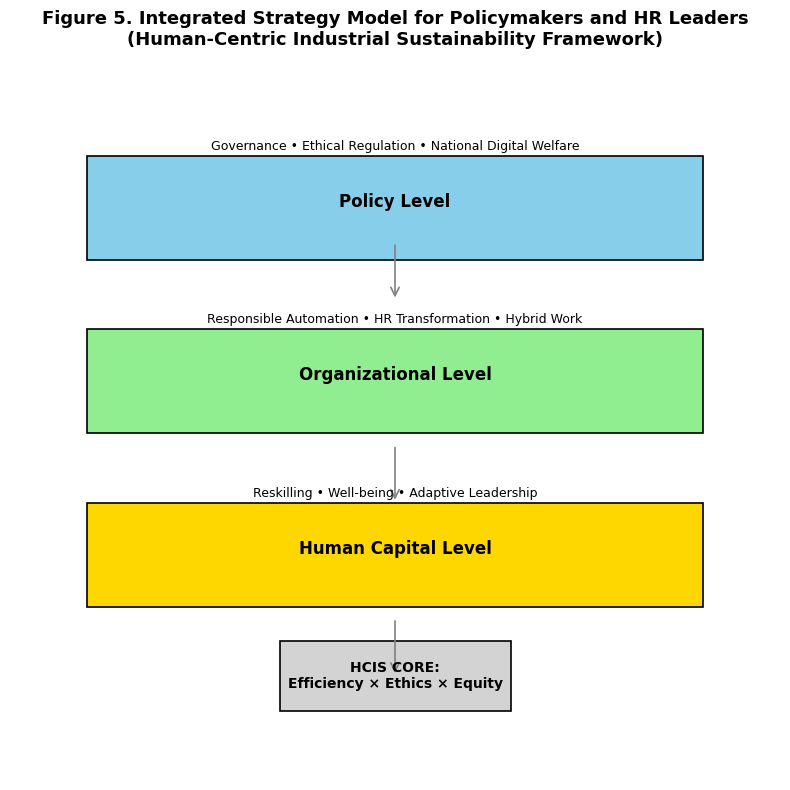

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

# --- Setup Canvas ---
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 12)
ax.axis('off')

# --- Draw main level boxes ---
levels = [
    {"title": "Policy Level", "y": 10, "color": "#87CEEB",
     "desc": "Governance • Ethical Regulation • National Digital Welfare"},
    {"title": "Organizational Level", "y": 7, "color": "#90EE90",
     "desc": "Responsible Automation • HR Transformation • Hybrid Work"},
    {"title": "Human Capital Level", "y": 4, "color": "#FFD700",
     "desc": "Reskilling • Well-being • Adaptive Leadership"}
]

for lvl in levels:
    # Main box
    ax.add_patch(Rectangle((1, lvl["y"] - 1), 8, 1.8, facecolor=lvl["color"], edgecolor="black", linewidth=1.2))
    # Title
    ax.text(5, lvl["y"], lvl["title"], ha='center', va='center', fontsize=12, fontweight='bold')
    # Description (above each box)
    ax.text(5, lvl["y"] + 0.9, lvl["desc"], ha='center', fontsize=9)

# --- Central HCIS Core Box ---
ax.add_patch(Rectangle((3.5, 1.2), 3, 1.2, facecolor="#D3D3D3", edgecolor="black", linewidth=1.2))
ax.text(5, 1.8, "HCIS CORE:\nEfficiency × Ethics × Equity", ha='center', va='center', fontsize=10, fontweight='bold')

# --- Downward arrows between boxes ---
arrow_positions = [(5, 9.5), (5, 6), (5, 3)]
for (x, y) in arrow_positions:
    arrow = FancyArrowPatch((x, y - 0.2), (x, y - 1.2),
                            arrowstyle='->', mutation_scale=15,
                            linewidth=1.2, color='gray')
    ax.add_patch(arrow)

# --- Title ---
plt.title("Figure 5. Integrated Strategy Model for Policymakers and HR Leaders\n(Human-Centric Industrial Sustainability Framework)",
          fontsize=13, fontweight='bold', pad=30)

# --- Layout ---
plt.subplots_adjust(top=0.88, bottom=0.05)
plt.tight_layout()

# --- Save output ---
output_path = "/mnt/data/figure5_integrated_strategy_model_visible.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figure saved successfully at: {output_path}")


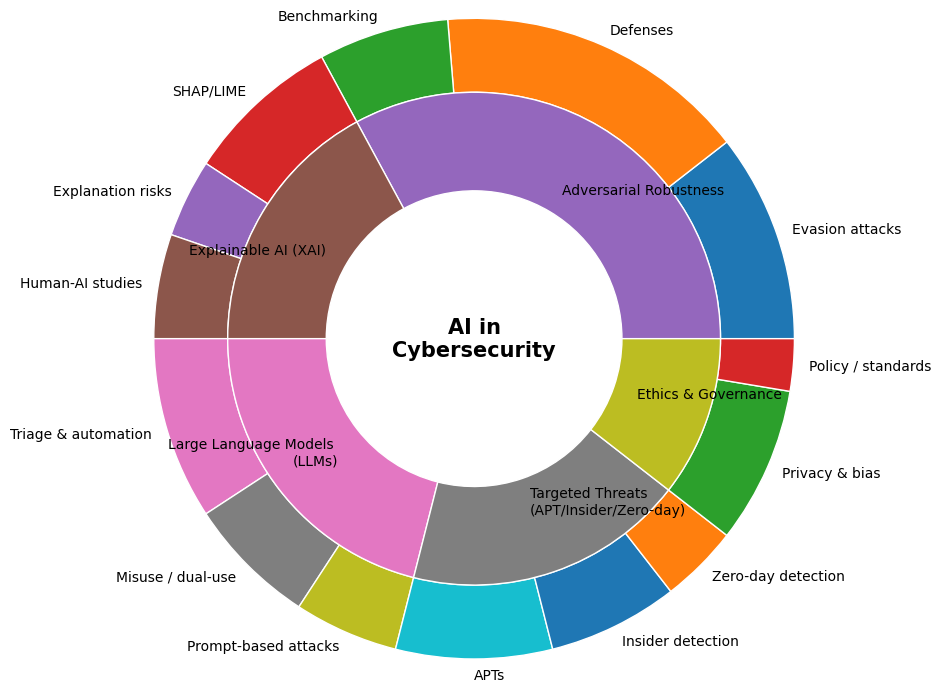

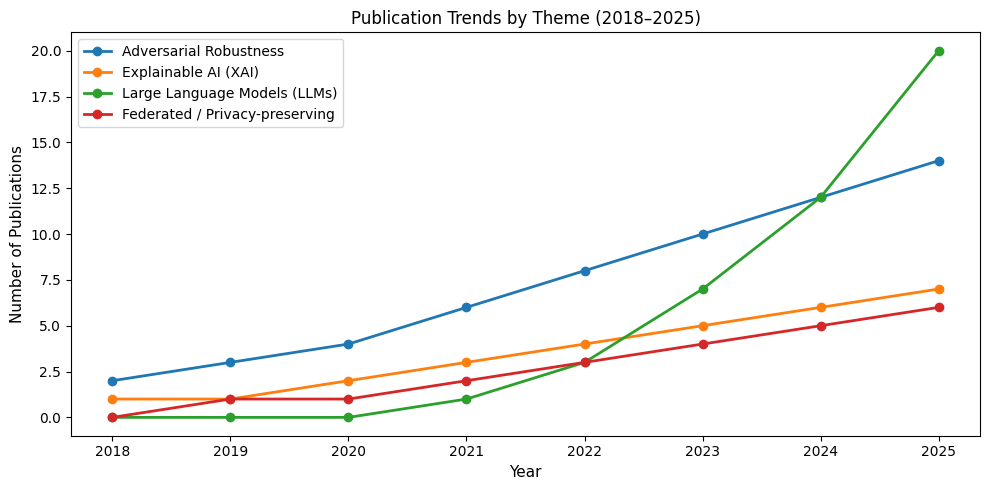


Trend Data Table:
       Adversarial Robustness  Explainable AI (XAI)  \
2018                       2                     1   
2019                       3                     1   
2020                       4                     2   
2021                       6                     3   
2022                       8                     4   
2023                      10                     5   
2024                      12                     6   
2025                      14                     7   

      Large Language Models (LLMs)  Federated / Privacy-preserving  
2018                             0                               0  
2019                             0                               1  
2020                             0                               1  
2021                             1                               2  
2022                             3                               3  
2023                             7                               4  
2024      

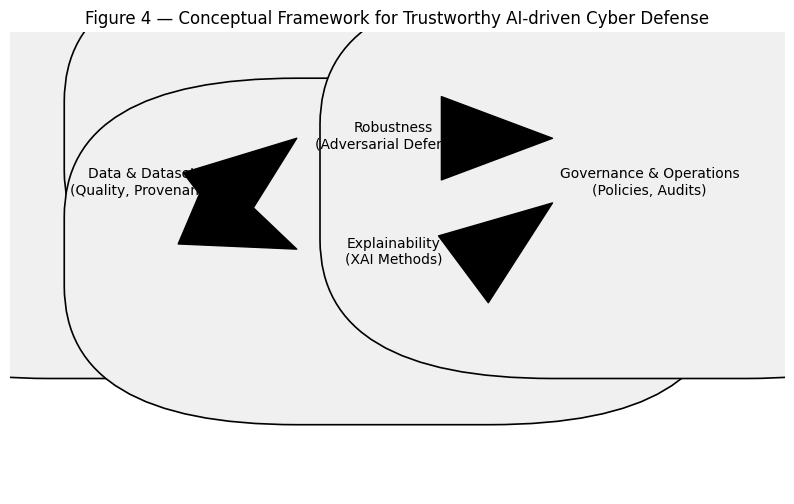


✅ Figures saved as:
 - figure2_taxonomy_sunburst.png
 - figure3_trend_lines.png
 - figure4_conceptual_framework.png


In [ ]:
# ==============================
#  FIGURES FOR AI-CYBERSECURITY REVIEW PAPER
#  - Figure 2: Taxonomy (sunburst / hierarchical)
#  - Figure 3: Publication trend lines (2018–2025)
#  - Figure 4: Conceptual framework diagram
# ==============================

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ConnectionPatch, ArrowStyle
import pandas as pd

# ---------------------------------------
# Figure 2 — Taxonomy of Themes (Sunburst)
# ---------------------------------------
theme_counts = {
    "Adversarial Robustness": {"Evasion attacks": 8, "Defenses": 12, "Benchmarking": 5},
    "Explainable AI (XAI)": {"SHAP/LIME": 6, "Explanation risks": 3, "Human-AI studies": 4},
    "\nLarge Language Models \n(LLMs)": {"Triage & automation": 7, "Misuse / dual-use": 5, "Prompt-based attacks": 4},
    "Targeted Threats \n(APT/Insider/Zero-day)": {"APTs": 6, "Insider detection": 5, "Zero-day detection": 3},
    "Ethics & Governance": {"Privacy & bias": 6, "Policy / standards": 2}
}

def plot_sunburst(theme_counts, filename="figure2_taxonomy_sunburst.png"):
    outer_labels, outer_sizes = [], []
    inner_labels, inner_sizes = [], []

    for theme, subs in theme_counts.items():
        theme_total = sum(subs.values())
        inner_labels.append(theme)
        inner_sizes.append(theme_total)
        for sub, count in subs.items():
            outer_labels.append(sub)
            outer_sizes.append(count)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis('equal')

    # Outer ring (subtopics)
    ax.pie(outer_sizes, radius=1.3, labels=outer_labels, labeldistance=1.05,
           wedgeprops=dict(width=0.3, edgecolor='w'))
    # Inner ring (themes)
    ax.pie(inner_sizes, radius=1.0, labels=inner_labels, labeldistance=0.7,
           wedgeprops=dict(width=0.4, edgecolor='w'))

    plt.text(0, 0, "AI in\nCybersecurity", ha='center', va='center', fontsize=15, weight='bold')
    plt.title("", fontsize=12)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_sunburst(theme_counts)

# ---------------------------------------
# Figure 3 — Publication Trends 2018–2025
# ---------------------------------------
years = list(range(2018, 2026))
trend_counts = {
    "Adversarial Robustness": [2, 3, 4, 6, 8, 10, 12, 14],
    "Explainable AI (XAI)": [1, 1, 2, 3, 4, 5, 6, 7],
    "Large Language Models (LLMs)": [0, 0, 0, 1, 3, 7, 12, 20],
    "Federated / Privacy-preserving": [0, 1, 1, 2, 3, 4, 5, 6]
}

def plot_trends(years, trend_counts, filename="figure3_trend_lines.png"):
    fig, ax = plt.subplots(figsize=(10, 5))
    for theme, counts in trend_counts.items():
        ax.plot(years, counts, marker='o', linewidth=2, label=theme)
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel("Number of Publications", fontsize=11)
    ax.set_title("Publication Trends by Theme (2018–2025)", fontsize=12)
    ax.set_xticks(years)
    ax.grid(False)
    ax.legend(frameon=True)
    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_trends(years, trend_counts)

# Optional: show underlying trend table
trend_df = pd.DataFrame(trend_counts, index=years)
print("\nTrend Data Table:\n", trend_df)

# ---------------------------------------
# Figure 4 — Conceptual Framework Diagram
# ---------------------------------------
def plot_framework(filename="figure4_conceptual_framework.png"):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.axis('off')

    # Helper function
    def add_box(x, y, w, h, text, fontsize=10):
        box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.3",
                             ec="black", fc="#f0f0f0", lw=1.2)
        ax.add_patch(box)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center',
                fontsize=fontsize, wrap=True)

    # Boxes
    add_box(0.05, 0.55, 0.25, 0.25, "Data & Datasets\n(Quality, Provenance)")
    add_box(0.37, 0.7, 0.25, 0.15, "Robustness\n(Adversarial Defenses)")
    add_box(0.37, 0.45, 0.25, 0.15, "Explainability\n(XAI Methods)")
    add_box(0.70, 0.55, 0.25, 0.25, "Governance & Operations\n(Policies, Audits)")

    # Connections
    def connect(p1, p2):
        con = ConnectionPatch(xyA=p1, coordsA="data",
                              xyB=p2, coordsB="data",
                              arrowstyle=ArrowStyle("Simple", head_length=8, head_width=6),
                              color="black", lw=1)
        ax.add_patch(con)

    connect((0.30, 0.68), (0.37, 0.77))   # Data → Robustness
    connect((0.30, 0.58), (0.37, 0.53))   # Data → XAI
    connect((0.62, 0.77), (0.70, 0.77))   # Robustness → Governance
    connect((0.62, 0.53), (0.70, 0.63))   # XAI → Governance

    plt.title("Figure 4 — Conceptual Framework for Trustworthy AI-driven Cyber Defense", fontsize=12)
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_framework()

print("\n✅ Figures saved as:")
print(" - figure2_taxonomy_sunburst.png")
print(" - figure3_trend_lines.png")
print(" - figure4_conceptual_framework.png")


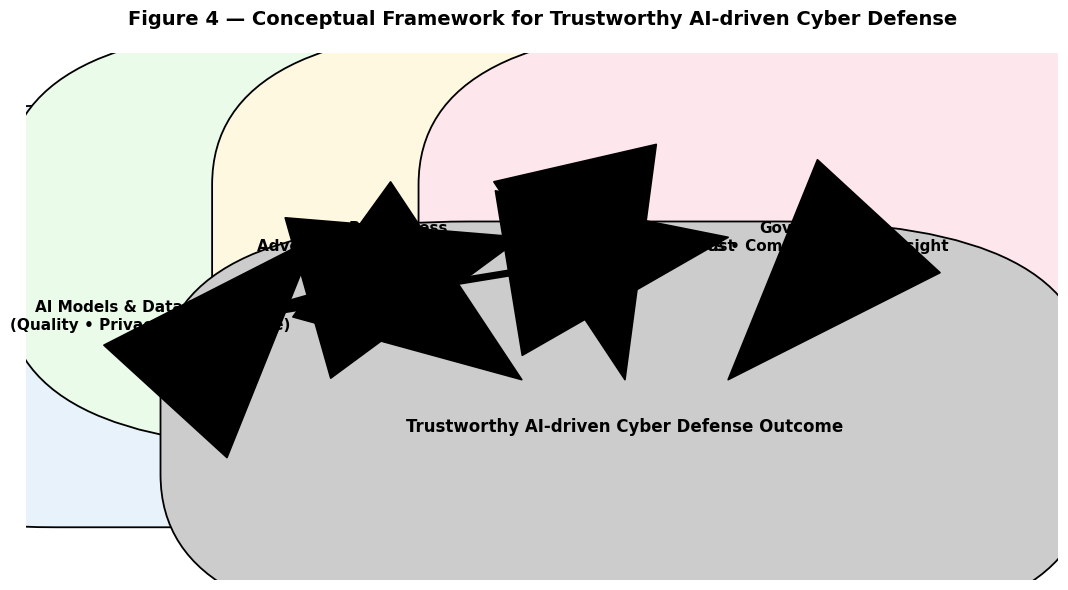

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ConnectionPatch, ArrowStyle

def redesigned_framework(filename="figure4_framework_clear.png"):
    fig, ax = plt.subplots(figsize=(11, 6))
    ax.axis('off')

    # Helper function for rounded boxes
    def add_box(x, y, w, h, text, color, fontsize=11, weight='bold'):
        box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.3",
                             ec="black", fc=color, lw=1.3)
        ax.add_patch(box)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center',
                fontsize=fontsize, weight=weight, wrap=True)

    # -------------------------------
    # BOX POSITIONS (Left → Right)
    # -------------------------------
    add_box(0.03, 0.4, 0.18, 0.2, "AI Models & Data Pipelines\n(Quality • Privacy • Provenance)", "#e7f2fa")

    # Core pillars
    add_box(0.28, 0.55, 0.16, 0.2, "Robustness\nAdversarial Defense • Resilience", "#eafbea")
    add_box(0.48, 0.55, 0.16, 0.2, "Explainability\nInterpretability • Human Trust", "#fff8e1")
    add_box(0.68, 0.55, 0.16, 0.2, "Governance\nEthics • Compliance • Oversight", "#fde7ec")

    # Outcome box
    add_box(0.43, 0.20, 0.30, 0.18, "Trustworthy AI-driven Cyber Defense Outcome", "#cccccc", fontsize=12)

    # -------------------------------
    # CONNECTIONS (Arrows)
    # -------------------------------
    # Helper function
    def connect(p1, p2, color="black"):
        con = ConnectionPatch(xyA=p1, coordsA="data",
                              xyB=p2, coordsB="data",
                              arrowstyle=ArrowStyle("Simple", head_length=8, head_width=6),
                              color=color, lw=1.2, mutation_scale=20)
        ax.add_patch(con)

    # Arrows from Data & Models
    connect((0.21, 0.5), (0.28, 0.65)) # Data → Robustness
    connect((0.21, 0.5), (0.48, 0.65)) # Data → Explainability
    connect((0.21, 0.5), (0.68, 0.65)) # Data → Governance

    # Arrows from Pillars to Outcome
    connect((0.36, 0.55), (0.48, 0.38)) # Robustness → Outcome
    connect((0.56, 0.55), (0.58, 0.38)) # Explainability → Outcome
    connect((0.76, 0.55), (0.68, 0.38)) # Governance → Outcome


    plt.title("Figure 4 — Conceptual Framework for Trustworthy AI-driven Cyber Defense", fontsize=14, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

redesigned_framework()

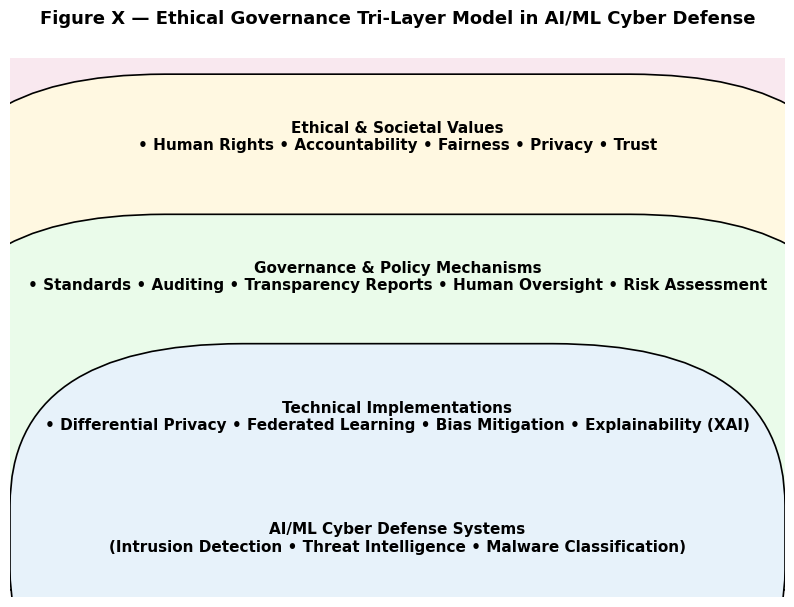

✅ Figure saved as figure5_ethical_governance_model.png


In [ ]:
# ==============================
# Figure X — Ethical Governance Tri-Layer Model for AI/ML Cyber Defense
# ==============================
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, ConnectionPatch, ArrowStyle

def ethical_governance_model(filename="figure5_ethical_governance_model.png"):
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.axis('off')

    # Helper function for rounded boxes
    def add_box(x, y, w, h, text, color, fontsize=11, weight='bold'):
        box = FancyBboxPatch((x, y), w, h, boxstyle="round,pad=0.3",
                             ec="black", fc=color, lw=1.2)
        ax.add_patch(box)
        ax.text(x + w/2, y + h/2, text, ha='center', va='center', fontsize=fontsize,
                weight=weight, wrap=True)

    # -------------------------------
    # LAYER 3 (Top): Ethical & Societal Values
    # -------------------------------
    add_box(0.2, 0.78, 0.6, 0.15,
            "Ethical & Societal Values\n• Human Rights • Accountability • Fairness • Privacy • Trust",
            "#f9e8ef", fontsize=11)

    # -------------------------------
    # LAYER 2 (Middle): Governance & Policy Mechanisms
    # -------------------------------
    add_box(0.2, 0.52, 0.6, 0.15,
            "Governance & Policy Mechanisms\n• Standards • Auditing • Transparency Reports • Human Oversight • Risk Assessment",
            "#fff8e1", fontsize=11)

    # -------------------------------
    # LAYER 1 (Bottom): Technical Implementations
    # -------------------------------
    add_box(0.2, 0.26, 0.6, 0.15,
            "Technical Implementations\n• Differential Privacy • Federated Learning • Bias Mitigation • Explainability (XAI)",
            "#eafbea", fontsize=11)

    # Base box (AI/ML Cyber Defense Applications)
    add_box(0.3, 0.05, 0.4, 0.12,
            "AI/ML Cyber Defense Systems\n(Intrusion Detection • Threat Intelligence • Malware Classification)",
            "#e7f2fa", fontsize=11)

    # -------------------------------


    # -------------------------------
    # Title and description
    # -------------------------------
    plt.title("Figure X — Ethical Governance Tri-Layer Model in AI/ML Cyber Defense",
              fontsize=13, pad=25, weight='bold')
    plt.text(0.5, 0.92,
             "",
             ha='center', fontsize=10.5)

    # Save
    plt.savefig(filename, dpi=400, bbox_inches='tight')
    plt.show()
    print(f"✅ Figure saved as {filename}")

ethical_governance_model()
